In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [79]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [80]:
n_firms = 10 
n_consumers = 10000
n_chars = 2
T = 1
s = 659485

In [81]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [82]:
prices_optimal = model.prices.flatten()
v_p = model.v_p
product_cars = model.produc_chars
shares = model.market_shares.flatten()
print(product_cars)
print(prices_optimal)
print(v_p)
print(shares)

[[1.         5.59909767 1.14528084]
 [1.         2.76131278 4.44136934]
 [1.         5.1241512  1.46982885]
 [1.         2.12219656 3.16477092]
 [1.         1.68051927 4.3925286 ]
 [1.         5.41472577 1.9538819 ]
 [1.         5.26485981 5.6115399 ]
 [1.         3.62086136 2.64700042]
 [1.         5.17430984 4.07695181]
 [1.         2.46675109 2.97245625]]
[4.50693177 4.51415887 4.62150975 4.7792972  4.71088726 4.46659961
 3.94206663 4.66455969 4.26960911 4.85546795]
[[ 2.1767677 ]
 [-2.02061598]
 [ 0.7298435 ]
 ...
 [ 0.52805369]
 [ 0.07091449]
 [-0.74340745]]
[0.00118864 0.00102606 0.00106846 0.00128484 0.00111036 0.0010399
 0.00073526 0.00111321 0.00076906 0.00111094]


In [83]:
def compute_share_check(v_p, price, produc_chars, n_firms, mu=0.5, omega=0.2, beta1=2, beta2=-0.3, beta3=-0.3, n_consumers=n_consumers):
    price_r = np.reshape(price, (1, n_firms))
    alpha_0 = -np.exp(mu + (omega)**2/2)

    beta = np.array([beta1,beta2, beta3])
    mean_indirect_utility = produc_chars@beta + alpha_0*price

    mean_indirect_utlity_for_utility = np.repeat(mean_indirect_utility, n_consumers, axis=0)

    alpha_i = np.reshape((-(np.exp(mu + omega*v_p))+np.exp(mu + (omega)**2/2)), (n_consumers, 1))
    random_coeff = np.ravel((alpha_i*price_r).T)


    u = mean_indirect_utlity_for_utility + random_coeff
    u_r = np.reshape(u, (n_firms, n_consumers))
    sum_u = np.sum(np.exp(u_r), axis =0)

    all_probs = np.exp(u_r)/(1 + sum_u)
    market_shares = np.sum(all_probs, axis=1)/n_consumers

    return market_shares, 1 - np.sum(market_shares)

In [84]:
params = ['beta1', 'beta2', 'beta3']
range_values = np.arange(-2.25, 20, 0.25)


for param, value in zip(params, range_values):
    max_share = []
    min_share = []
    outside_good_share = []

    for j in range_values:
        if param == 'beta1':
            shares_check, outside_share = compute_share_check(v_p, prices_optimal, product_cars, n_firms, beta1=j)
        elif param == 'beta2':
            shares_check, outside_share = compute_share_check(v_p, prices_optimal, product_cars, n_firms, beta2=j)
        elif param == 'beta3':
            shares_check, outside_share = compute_share_check(v_p, prices_optimal, product_cars, n_firms, beta3=j)

        max_share_in = np.max(shares_check)
        min_share_in = np.min(shares_check)
        max_share.append(max_share_in)
        min_share.append(min_share_in)
        outside_good_share.append(outside_share)

    globals()[f"max_share_{param}"] = max_share
    globals()[f"min_share_{param}"] = min_share
    globals()[f"outside_good_share_{param}"] = outside_good_share



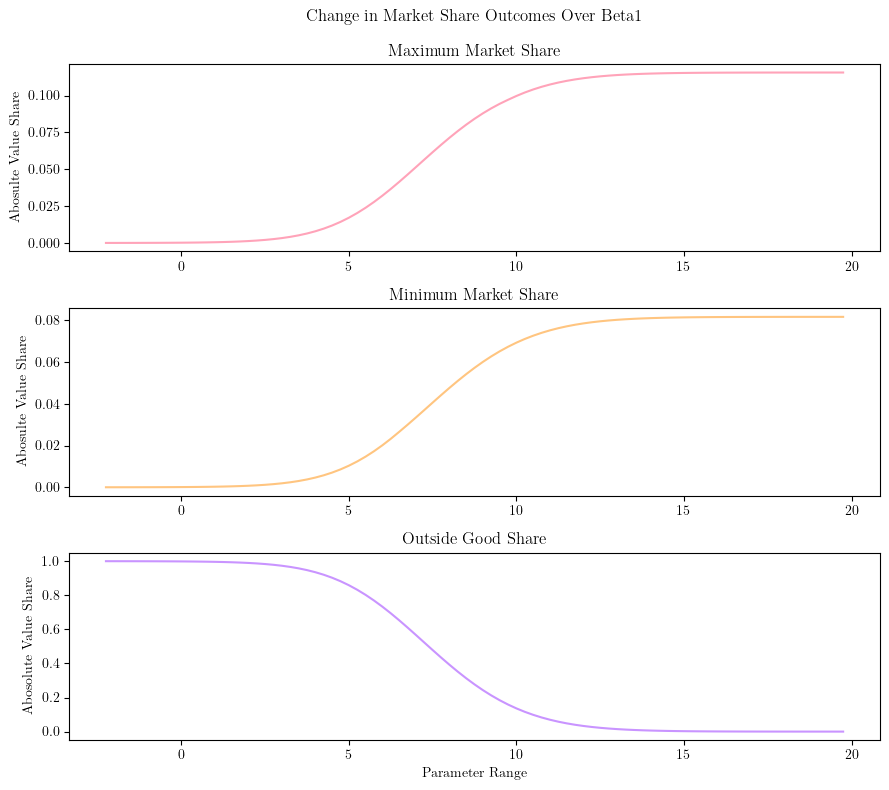

In [85]:
# Create plots
plt.figure(figsize=(9, 8))

# Plot max_share
plt.subplot(3, 1, 1)
plt.plot(range_values, max_share_beta1, color='#FFA3B9')
plt.title("Change in Market Share Outcomes Over Beta1  \n \n Maximum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Abosulte Value Share")

# Plot min_share
plt.subplot(3, 1, 2)
plt.plot(range_values, min_share_beta1, color='#FFC580')
plt.title("Minimum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Abosulte Value Share")

# Plot outside_good_share
plt.subplot(3, 1, 3)
plt.plot(range_values, outside_good_share_beta1, color='#C994FF')
plt.title("Outside Good Share")
plt.xlabel("Parameter Range")
plt.ylabel("Abosolute Value Share")

plt.tight_layout()
plt.savefig('../plots/sensitivity_beta1.pdf')
plt.show()

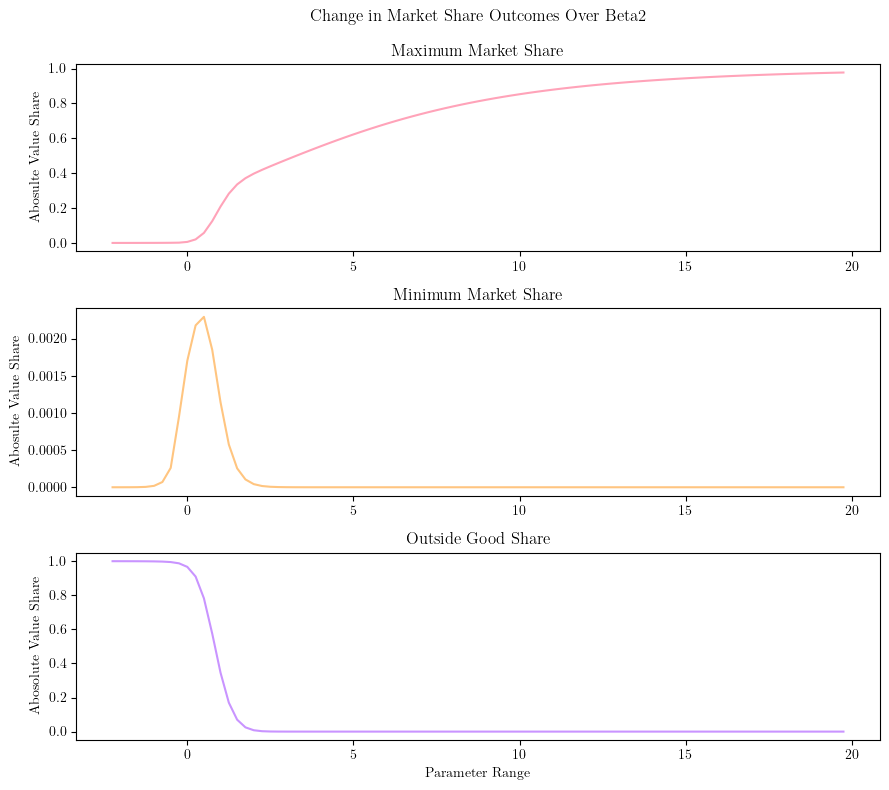

In [86]:
# Create plots
plt.figure(figsize=(9, 8))

# Plot max_share
plt.subplot(3, 1, 1)
plt.plot(range_values, max_share_beta2, color='#FFA3B9')
plt.title("Change in Market Share Outcomes Over Beta2  \n \n Maximum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Abosulte Value Share")

# Plot min_share
plt.subplot(3, 1, 2)
plt.plot(range_values, min_share_beta2, color='#FFC580')
plt.title("Minimum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Abosulte Value Share")

# Plot outside_good_share
plt.subplot(3, 1, 3)
plt.plot(range_values, outside_good_share_beta2, color='#C994FF')
plt.title("Outside Good Share")
plt.xlabel("Parameter Range")
plt.ylabel("Abosolute Value Share")

plt.tight_layout()
plt.savefig('../plots/sensitivity_beta2.pdf')
plt.show()

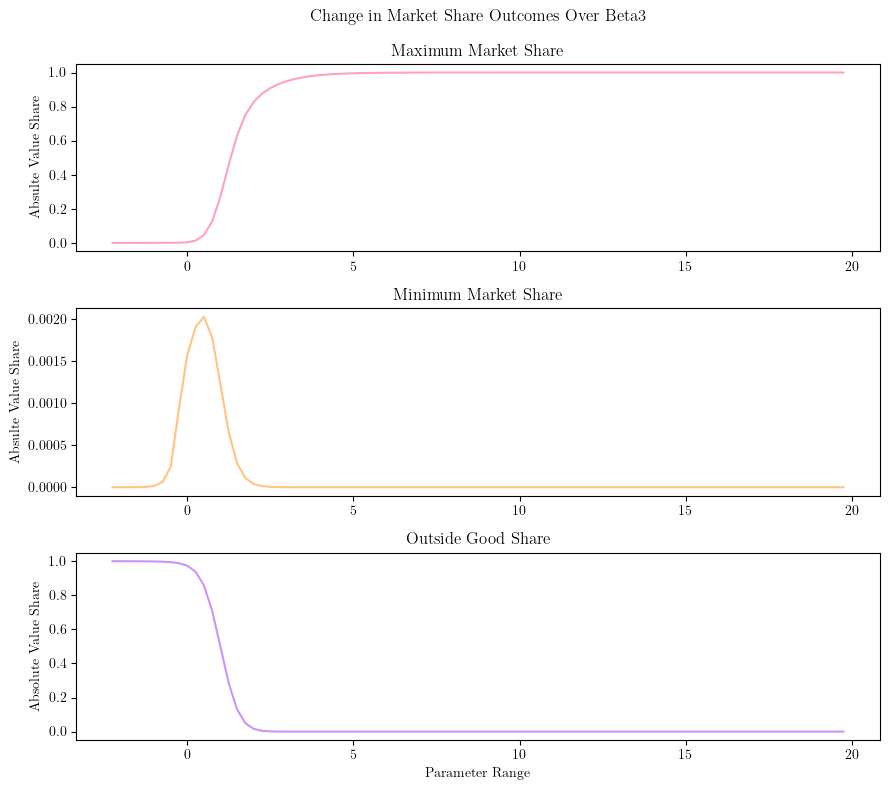

In [87]:
# Create plots
plt.figure(figsize=(9, 8))

# Plot max_share
plt.subplot(3, 1, 1)
plt.plot(range_values, max_share_beta3, color='#FFA3B9')
plt.title("Change in Market Share Outcomes Over Beta3  \n \n Maximum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Absulte Value Share")

# Plot min_share
plt.subplot(3, 1, 2)
plt.plot(range_values, min_share_beta3, color='#FFC580')
plt.title("Minimum Market Share")
# plt.xlabel("Parameter Range")
plt.ylabel("Absulte Value Share")

# Plot outside_good_share
plt.subplot(3, 1, 3)
plt.plot(range_values, outside_good_share_beta3, color='#C994FF')
plt.title("Outside Good Share")
plt.xlabel("Parameter Range")
plt.ylabel("Absolute Value Share")

plt.tight_layout()
plt.savefig('../plots/sensitivity_beta3.pdf')
plt.show()

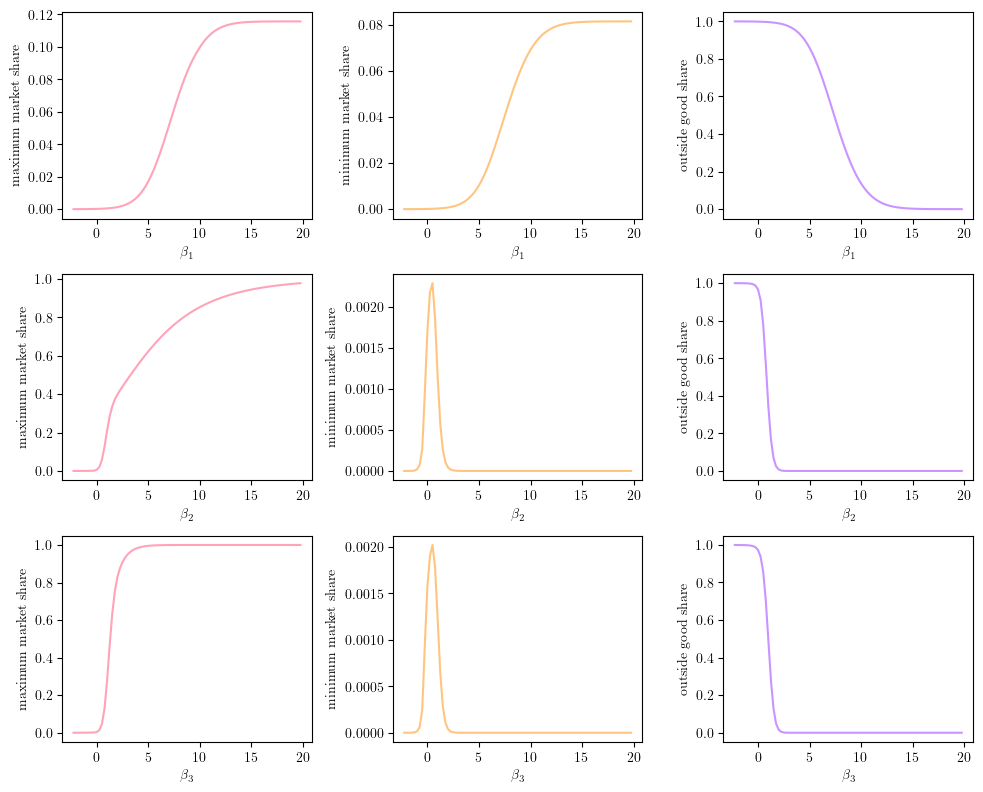

In [88]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8))


data = [[max_share_beta1, min_share_beta1, outside_good_share_beta1],
        [max_share_beta2, min_share_beta2, outside_good_share_beta2],
        [max_share_beta3, min_share_beta3, outside_good_share_beta3]]
ylabels = ['maximum market share', 'minimum market share', 'outside good share']
colors = ['#FFA3B9', '#FFC580', '#C994FF']

i = 0
for row in range(3):
    for col in range(3):
        ax[row, col].plot(range_values, data[row][col], c=colors[col])
        ax[row, col].set_xlabel(f'$\\beta_{row+1}$')
        ax[row, col].set_ylabel(ylabels[col])

plt.tight_layout()
plt.savefig('../plots/beta_sensitivity.pdf', bbox_inches='tight')
plt.show()